# Dataset analysis 

In [25]:
import numpy as np
import math
import pandas as pd
import os

import matplotlib.pyplot as plt
from matplotlib import  cm

dimension from file scan_MyoSegmenTUM_001.npy
	from dim 0 : shape (6, 221, 81, 221) .
	from dim 1 : shape (6, 81, 221, 221) .
	




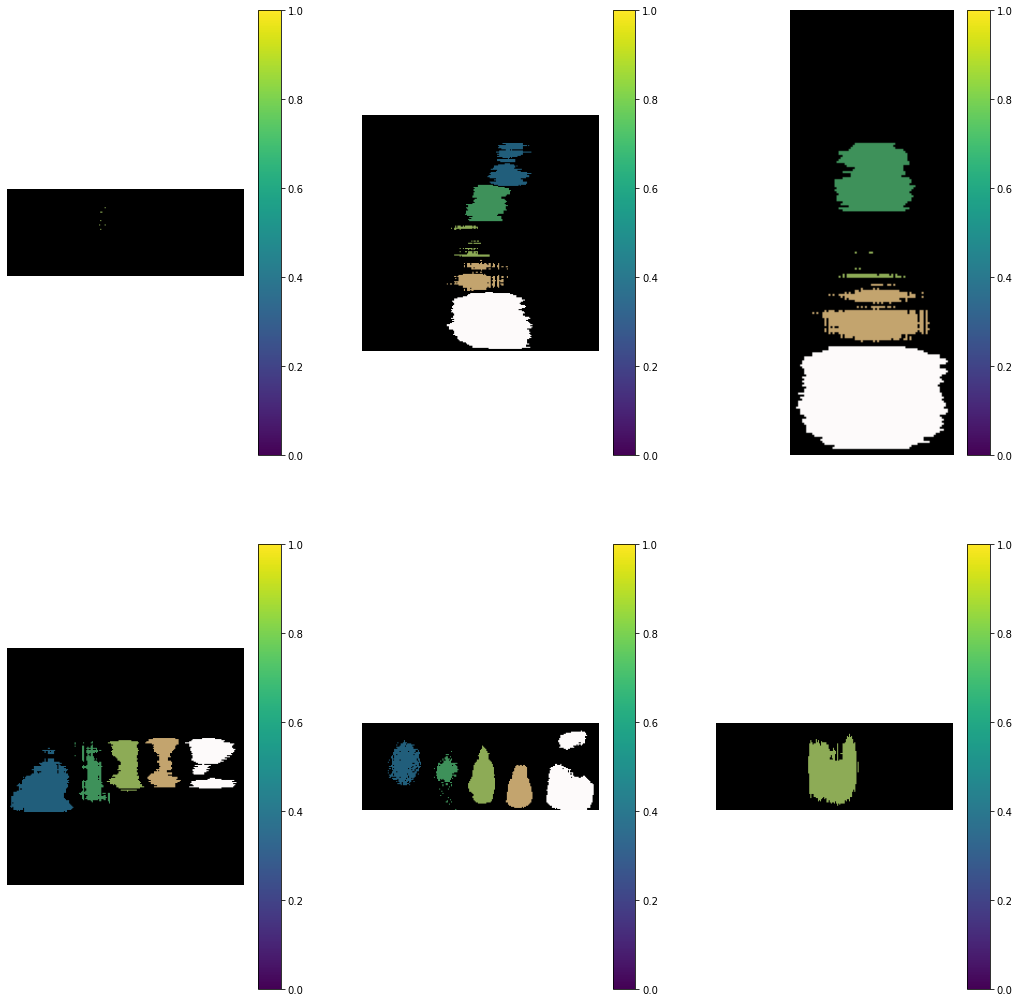

dimension from file scan_MyoSegmenTUM_001_res.npy
	from dim 0 : shape (221, 81, 221) .
	from dim 1 : shape (81, 221, 221) .
	


dimension from file scan_MyoSegmenTUM_002.npy
	from dim 0 : shape (6, 221, 81, 221) .
	from dim 1 : shape (6, 81, 221, 221) .
	




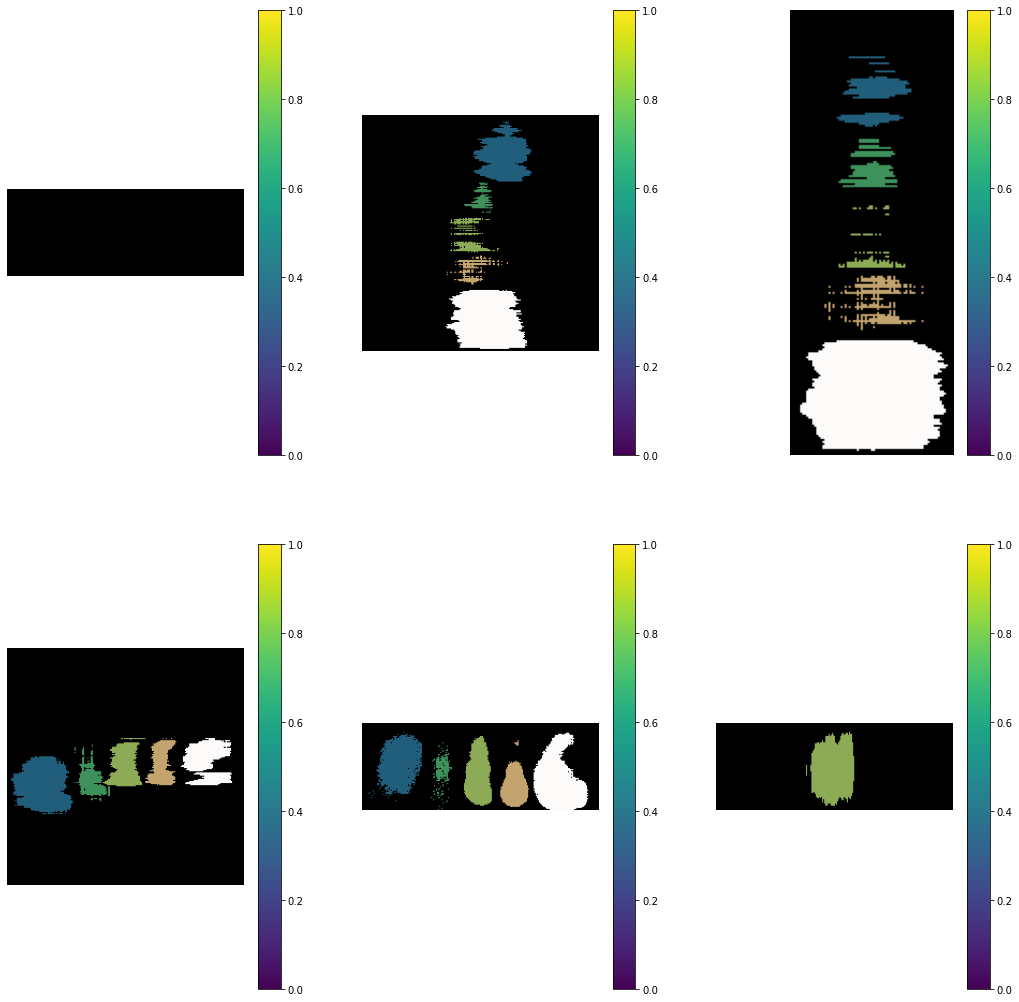

dimension from file scan_MyoSegmenTUM_002_res.npy
	from dim 0 : shape (221, 81, 221) .
	from dim 1 : shape (81, 221, 221) .
	


dimension from file scan_MyoSegmenTUM_003.npy
	from dim 0 : shape (6, 221, 81, 221) .
	from dim 1 : shape (6, 81, 221, 221) .
	


dimension from file scan_MyoSegmenTUM_010.npy
	from dim 0 : shape (6, 221, 80, 221) .
	from dim 1 : shape (6, 80, 221, 221) .
	




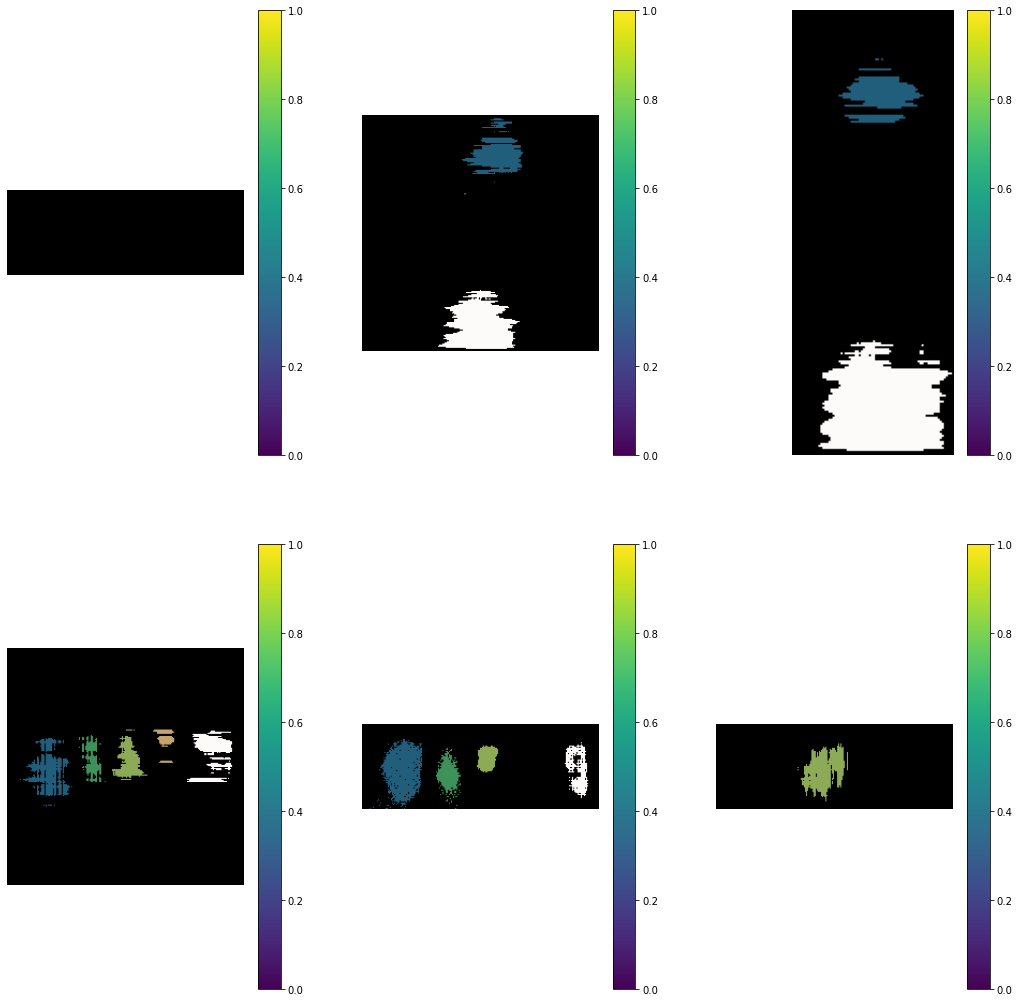

dimension from file scan_MyoSegmenTUM_010_res.npy
	from dim 0 : shape (221, 80, 221) .
	from dim 1 : shape (80, 221, 221) .
	


dimension from file scan_MyoSegmenTUM_011.npy
	from dim 0 : shape (6, 221, 80, 221) .
	from dim 1 : shape (6, 80, 221, 221) .
	




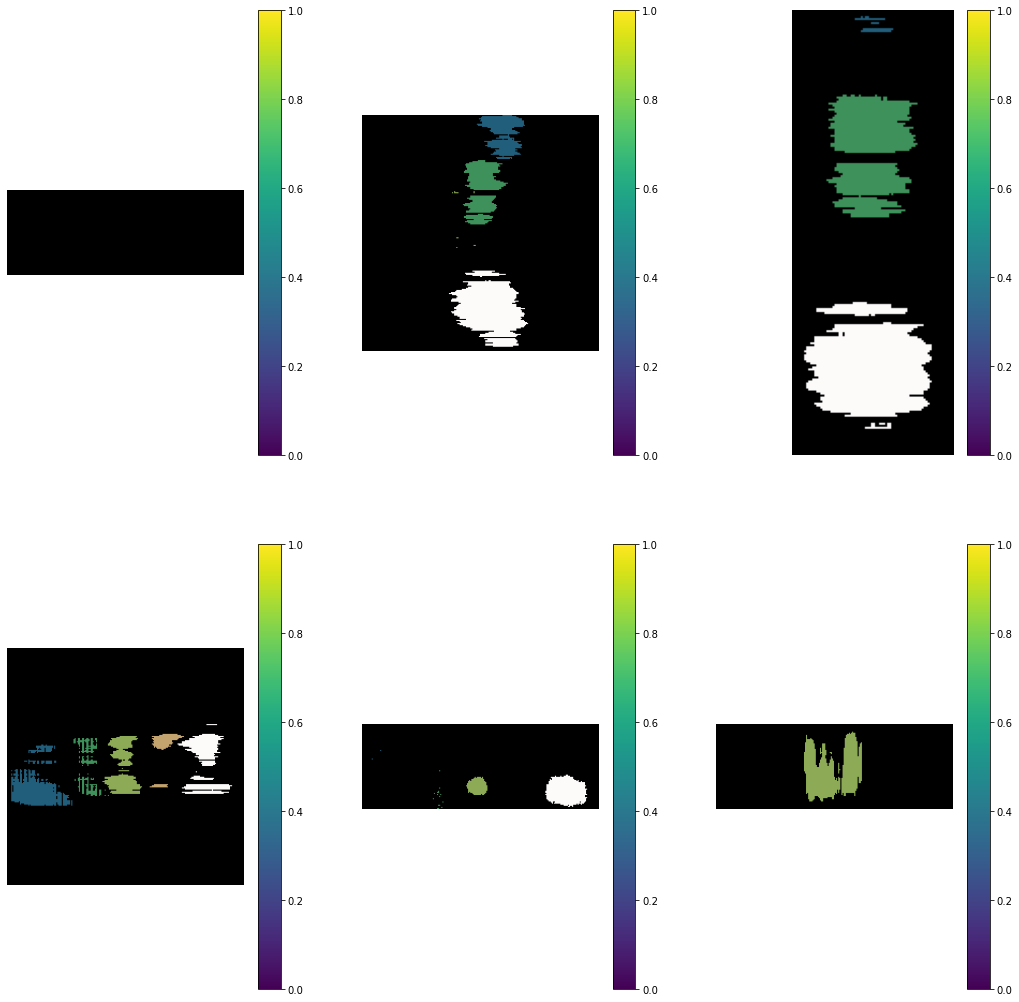

dimension from file scan_MyoSegmenTUM_011_res.npy
	from dim 0 : shape (221, 80, 221) .
	from dim 1 : shape (80, 221, 221) .
	


dimension from file scan_MyoSegmenTUM_012.npy
	from dim 0 : shape (6, 221, 81, 221) .
	from dim 1 : shape (6, 81, 221, 221) .
	


dimension from file scan_MyoSegmenTUM_018.npy
	from dim 0 : shape (6, 221, 80, 221) .
	from dim 1 : shape (6, 80, 221, 221) .
	




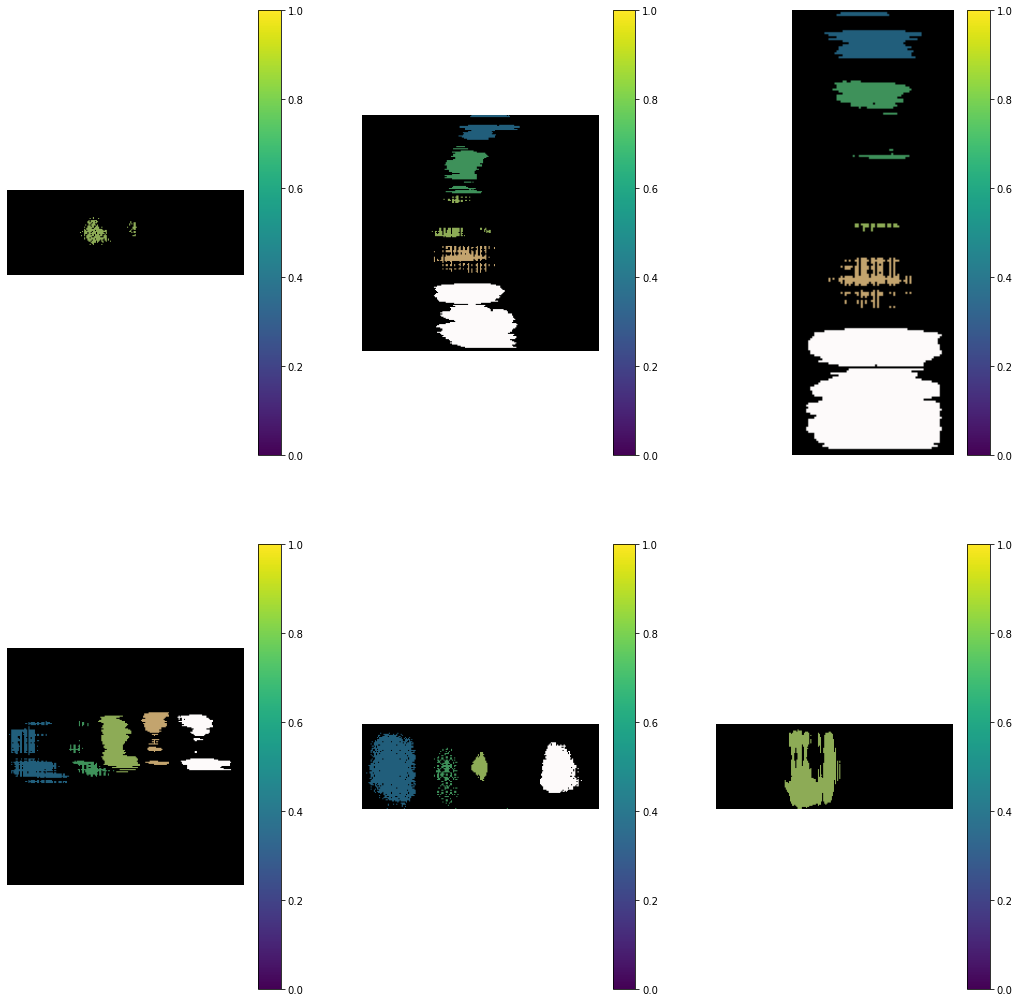

dimension from file scan_MyoSegmenTUM_018_res.npy
	from dim 0 : shape (221, 80, 221) .
	from dim 1 : shape (80, 221, 221) .
	


dimension from file scan_MyoSegmenTUM_023.npy
	from dim 0 : shape (6, 221, 80, 221) .
	from dim 1 : shape (6, 80, 221, 221) .
	




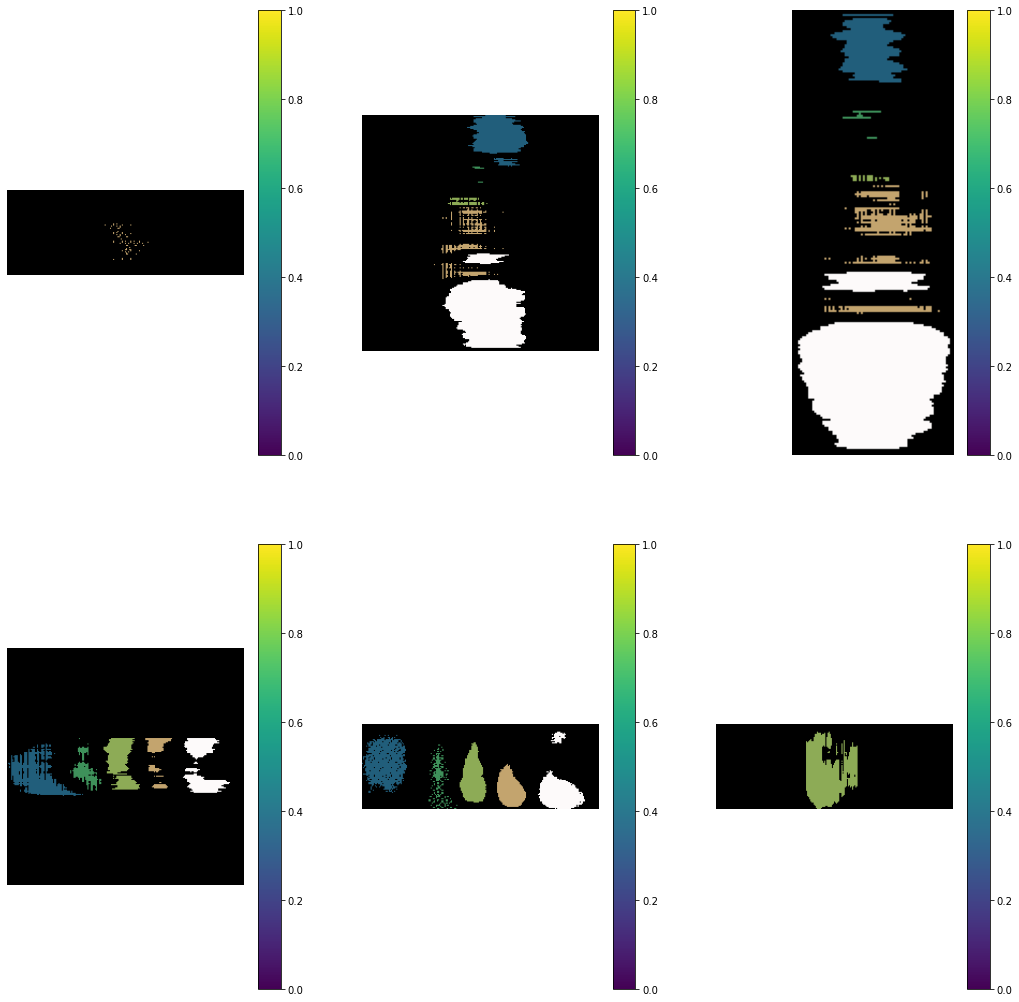

dimension from file scan_MyoSegmenTUM_023_res.npy
	from dim 0 : shape (221, 80, 221) .
	from dim 1 : shape (80, 221, 221) .
	


dimension from file scan_MyoSegmenTUM_025.npy
	from dim 0 : shape (6, 221, 80, 221) .
	from dim 1 : shape (6, 80, 221, 221) .
	




In [23]:
res_folder = r'/media/jan/MastatThesis/temp/'
folder_3d = os.path.join(res_folder, r'3D_reconstruct_test')
dataset_0 = os.path.join(res_folder, r'dataset_0_contrast_3')
dataset_1 = os.path.join(res_folder, r'dataset_1_contrast_3')

splits = ['train', 'test', 'val']
dims = [0, 1]
foldername = 'dimension_D_split_S'

for split in splits:
    foldernames = [foldername.replace('S', split).replace('D', str(d)) for d in dims]
    counter = 0
    for file_name in os.listdir(os.path.join(folder_3d, foldernames[0])):
        if counter > 4:
            break
        output = [f'dimension from file {file_name}']
        output += [f'from dim {i} : shape {np.load(os.path.join(folder_3d, fn, file_name)).shape} .' for i, fn in enumerate(foldernames)]
        output += ['\n\n']
        if file_name.endswith('_res.npy'):
            plt.figure(figsize=(18,18))
            for i in [0, 1]:
                arr = np.load(os.path.join(folder_3d, foldernames[i], file_name))
                for j in range(3):
                    plt.subplot(2,3,i*3+j+1)
                    plt.imshow(cm.gist_earth(np.take(arr, arr.shape[j]//2, axis=j)*51))
                    plt.axis('off')
                    plt.colorbar()
            plt.show()
            
        print('\n\t'.join(output))
        counter += 1

In [24]:
dataset_0 = os.path.join(dataset_0, )